In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Download multiple assets history
def download(tickers, start=None, end=None, actions=False, threads=True,
             group_by='column', auto_adjust=False, back_adjust=False,
             progress=True, period="max", show_errors=True, interval="1d", prepost=False,
             proxy=None, rounding=False, timeout=None, **kwargs):
    """Download yahoo tickers
    :Parameters:
        tickers : str, list
            List of tickers to download
        period : str
            Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
            Either Use period parameter or use start and end
        interval : str
            Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
            Intraday data cannot extend last 60 days
        start: str
            Download start date string (YYYY-MM-DD) or _datetime.
            Default is 1900-01-01
        end: str
            Download end date string (YYYY-MM-DD) or _datetime.
            Default is now
        group_by : str
            Group by 'ticker' or 'column' (default)
        prepost : bool
            Include Pre and Post market data in results?
            Default is False
        auto_adjust: bool
            Adjust all OHLC automatically? Default is False
        actions: bool
            Download dividend + stock splits data. Default is False
        threads: bool / int
            How many threads to use for mass downloading. Default is True
        proxy: str
            Optional. Proxy server URL scheme. Default is None
        rounding: bool
            Optional. Round values to 2 decimal places?
        show_errors: bool
            Optional. Doesn't print errors if True
        timeout: None or float
            If not None stops waiting for a response after given number of
            seconds. (Can also be a fraction of a second e.g. 0.01)
    """


In [16]:
benchmark_ = ["^GSPC",]
portfolio_ = ['AAPL', 'GOOG', 'AMZN']

start_date_ = "2017-01-01"
end_date_  = "2022-03-31"
number_of_scenarios = 10000

return_vector = []
risk_vector = []
distrib_vector = []

#Get Information from Benchmark and Portfolio
df = yf.download(benchmark_, start=start_date_, end=end_date_)
df2 = yf.download(portfolio_, start=start_date_, end=end_date_)

#Clean Rows with No Values on both Benchmark and Portfolio
df = df.dropna(axis=0)
df2 = df2.dropna(axis=0)

#Matching the Days
df = df[df.index.isin(df2.index)]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  3 of 3 completed


In [17]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000


In [18]:
# Analysis of Benchmark
benchmark_vector = np.array(df['Close'])

#Create our Daily Returns
benchmark_vector = np.diff(benchmark_vector)/benchmark_vector[1:]

#Select or Final Return and Risk
benchmark_return = np.average(benchmark_vector)
benchmark_risk = np.std(benchmark_vector)

#Add our Benchmark info to our lists
return_vector.append(benchmark_return)
risk_vector.append(benchmark_risk)

In [19]:
# Analysis of Portfolio
portfolio_vector = np.array(df2['Close'])

#Create a loop for the number of scenarios we want:

for i in range(number_of_scenarios):
    #Create a random distribution that sums 1 
    # and is split by the number of stocks in the portfolio
    random_distribution = np.random.dirichlet(np.ones(len(portfolio_)),size=1)
    distrib_vector.append(random_distribution)
    
    #Find the Closing Price for everyday of the portfolio
    portfolio_matmul = np.matmul(random_distribution,portfolio_vector.T)
    
    #Calculate the daily return
    portfolio_matmul = np.diff(portfolio_matmul)/portfolio_matmul[:,1:]
    
    #Select or Final Return and Risk
    portfolio_return = np.average(portfolio_matmul, axis=1)
    portfolio_risk = np.std(portfolio_matmul, axis=1)
    
    #Add our Benchmark info to our lists
    return_vector.append(portfolio_return[0])
    risk_vector.append(portfolio_risk[0])

In [20]:
#Create Risk Boundaries
delta_risk = 0.05
min_risk = np.min(risk_vector)
max_risk = risk_vector[0]*(1+delta_risk)
risk_gap = [min_risk, max_risk]

In [21]:
#Portofolio Return and Risk Couple
portfolio_array = np.column_stack((return_vector,risk_vector))[1:,]

In [22]:
# Rule to create the best portfolio
# If the criteria of minimum risk is satisfied then:
if np.where(((portfolio_array[:,1]<= max_risk)))[0].shape[0]>1:
    min_risk_portfolio = np.where(((portfolio_array[:,1]<= max_risk)))[0]
    best_portfolio_loc = portfolio_array[min_risk_portfolio]
    max_loc = np.argmax(best_portfolio_loc[:,0])
    best_portfolio = best_portfolio_loc[max_loc]

# If the criteria of minimum risk is not satisfied then:
else:
    min_risk_portfolio = np.where(((portfolio_array[:,1]== np.min(risk_vector[1:]))))[0]
    best_portfolio_loc = portfolio_array[min_risk_portfolio]
    max_loc = np.argmax(best_portfolio_loc[:,0])
    best_portfolio = best_portfolio_loc[max_loc]

C:\Users\eduar\AppData\Local\Temp\ipykernel_2500\2824339101.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


[Text(0, -0.05, '-5.00%'),
 Text(0, 0.0, '0.00%'),
 Text(0, 0.05, '5.00%'),
 Text(0, 0.10000000000000002, '10.00%'),
 Text(0, 0.15000000000000002, '15.00%'),
 Text(0, 0.2, '20.00%'),
 Text(0, 0.25000000000000006, '25.00%'),
 Text(0, 0.30000000000000004, '30.00%'),
 Text(0, 0.35000000000000003, '35.00%')]

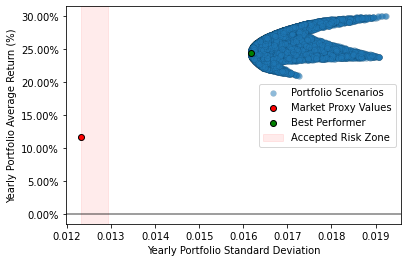

In [23]:
#Visual Representation
trade_days_per_year = 252
risk_gap = np.array(risk_gap)*trade_days_per_year
best_portfolio[0] = np.array(best_portfolio[0])*trade_days_per_year
x = np.array(risk_vector)
y = np.array(return_vector)*trade_days_per_year

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, 
           linewidths=0.1,  
           edgecolors='black', 
           label='Portfolio Scenarios'
            )

ax.scatter(x[0], 
           y[0], 
           color='red', 
           linewidths=1,  
           edgecolors='black', 
           label='Market Proxy Values')
 
ax.scatter(best_portfolio[1], 
            best_portfolio[0], 
            color='green', 
            linewidths=1,  
            edgecolors='black', 
            label='Best Performer')

ax.axvspan(min_risk,
           max_risk, 
           color='red', 
           alpha=0.08,
           label='Accepted Risk Zone')

ax.set_ylabel("Yearly Portfolio Average Return (%)")
ax.set_xlabel("Yearly Portfolio Standard Deviation")

ax.axhline(y=0, color='black',alpha=0.5)

ax = plt.gca()
ax.legend(loc=0)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
# ax.set_xticklabels(['{:,.2%}'.format(x) for x in vals])

In [24]:
#Output Table of Distributions
portfolio_loc = np.where((portfolio_array[:,0]==(best_portfolio[0]/trade_days_per_year))&(portfolio_array[:,1]==(best_portfolio[1])))[0][0]
best_distribution = distrib_vector[portfolio_loc][0].tolist()
d = {"Stock Name": portfolio_, "Stock % in Portfolio": best_distribution}
output = pd.DataFrame(d)
output = output.sort_values(by=["Stock % in Portfolio"],ascending=False)
output= output.style.format({"Stock % in Portfolio": "{:.2%}"})
output

,Stock Name,Stock % in Portfolio
2,AMZN,55.76%
0,AAPL,23.64%
1,GOOG,20.60%
